# Introduction <a name="1"></a>

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.
It took place from May 17, 2018 to August 29, 2018. For information on the winning entries, please see [here](https://www.kaggle.com/c/home-credit-default-risk/leaderboard/).

In this notebook, we follow a traditional data science project process to address the HCDR challenge of predicting fclients' repayment abilities using telco and transactional information.  

* We extract, transform, and load the data (**ETL**).
* Along the way, we do some exploratory data analysis (**EDA**).
* We conduct **feature engineering**.    
* We then **create models, evaluate their performance, and fine tune their parameters**.  
* We write up our **results**.  

To start you off, we will perform some basic visualization, feature engineering and preprocessing on the data provided.  Then, we build a baseline model using the mean of our training targets to predict our Days in the Hospital for our test set.  Finally, we will build a second model using Logostic regression over the following features to see if we can improve on our baseline model:

* numerical features
  * 
* Categorical features
  * 
* Target variable: indicating 0: the loan was repaid or 1: the loan was not repaid




## Which machine learning algorithm are you considering to use and why?

## Metrics that you might use to measure success (standard metrics and domain specific metrics)
Metric: ROC AUC
 is a common classification metric known as the Receiver Operating Characteristic Area Under the Curve (ROC AUC, also sometimes called AUROC).

The ROC AUC may sound intimidating, but it is relatively straightforward once you can get your head around the two individual concepts. The Reciever Operating Characteristic (ROC) curve graphs the true positive rate versus the false positive rate:

<img src="/root/shared/Documents/s526/I526_AML_SP19/class work/S526_project/1.png" width="500"/>

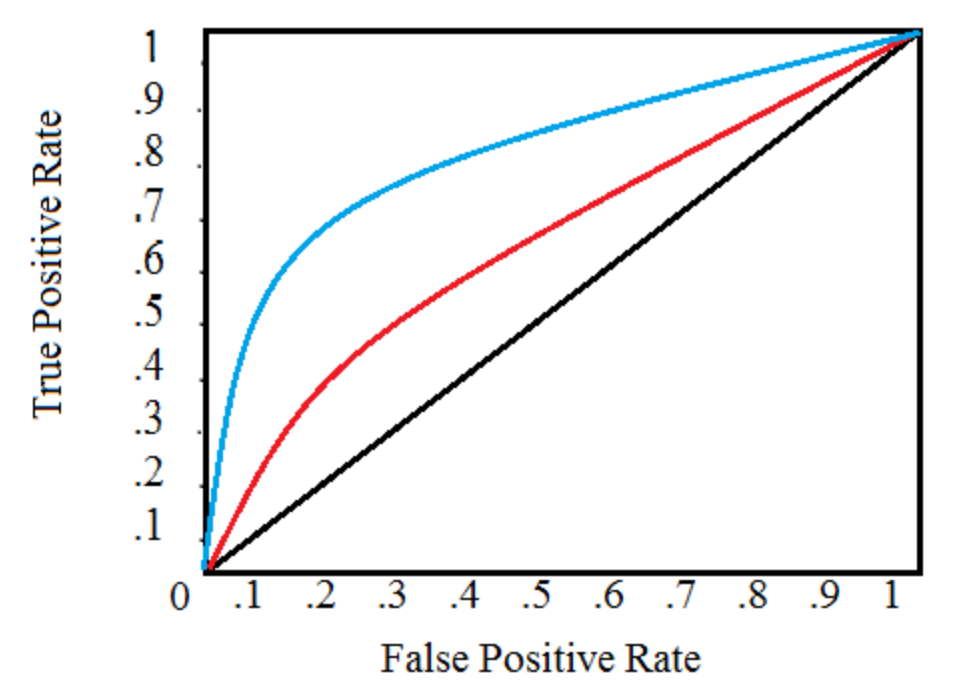


A single line on the graph indicates the curve for a single model, and movement along a line indicates changing the threshold used for classifying a positive instance. The threshold starts at 0 in the upper right to and goes to 1 in the lower left. A curve that is to the left and above another curve indicates a better model. For example, the blue model is better than the red model, which is better than the black diagonal line which indicates a naive random guessing model.

The Area Under the Curve (AUC) explains itself by its name! It is simply the area under the ROC curve. (This is the integral of the curve.) This metric is between 0 and 1 with a better model scoring higher. A model that simply guesses at random will have an ROC AUC of 0.5.

When we measure a classifier according to the ROC AUC, we do not generation 0 or 1 predictions, but rather a probability between 0 and 1. This may be confusing because we usually like to think in terms of accuracy, but when we get into problems with inbalanced classes (we will see this is the case), accuracy is not the best metric. For example, if I wanted to build a model that could detect terrorists with 99.9999% accuracy, I would simply make a model that predicted every single person was not a terrorist. Clearly, this would not be effective (the recall would be zero) and we use more advanced metrics such as ROC AUC or the F1 score to more accurately reflect the performance of a classifier. A model with a high ROC AUC will also have a high accuracy, but the ROC AUC is a better representation of model performance.

## A block diagram (Gantt diagram) of the key steps involved in completing this task and timeline

In [1]:
pwd


'/root/shared/Documents/s526/I526_AML_SP19/class work/S526_project'

## Description of the pipeline steps you plan to use

numerical pipeline on numerical features and categorical pipeline on categorical features. The numerical pipeline has DataFrameSelector, SimpleImputer with mean and StandardScaler transformations. The DataframeSelector is to select specific attributes from the DataFrame. The SimpleImputer is completing missing values with attribute mean. The StandardScaler is standardized features by removing the mean and scaling to unit variance. The categorical pipeline has DataFrameSelector, SimpleImputer with constant and OneHotEncoder transformations. The SimpleImputer is completing missing values with constant strategy. The OneHotEncoder transformation is used to encode categorical integer features as a one-hot numeric array. The input to this transformer should be an array-like of integers or strings and creates a binary column for each category and returns a sparse matrix or dense array. The full pipeline is generated by combining numerical and categorical pipelines. The full pipeline is used on training data to transform it for model input.

## List team members 

## Indication as to which part of the project each team member will be working on. e.g., I plan to build text-based features based on the product description and optimize random forest models using all available features and work on precision-recall measures; Naveen might sign up for processing all the numerical data (standardizing, dealing with missing values) and optimize regularized logistic regression models using all available features, and work on F-measure metrics. As a team you will need to integrate your SKlearn pipelines, your results,  your discussion, and conclusions.